<a href="https://colab.research.google.com/github/kiron-ang/introduction/blob/main/introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hi! My name is Kiron Ang, and I'm so excited to teach you about bioinformatics! This interactive Python notebook contains a tutorial for analyzing single-cell transcriptomic data with Python. Today, we'll be taking a look at publicly available data related to this research paper:

> Notaro, M., Borghetti, M., Bresesti, C. et al. In vivo armed macrophages curb liver metastasis through tumor-reactive T-cell rejuvenation. Nat Commun 16, 3471 (2025). https://doi.org/10.1038/s41467-025-58369-2

This dataset contains CD45⁺ immune cells isolated from mouse livers and liver metastases treated with experimental gene therapy to stimulate anti-tumor immunity. Although that might sound really complicated, I'll show you how to reproduce some of the basic analysis steps that the paper describes so you can understand more about the wonderful world of single-cell data! First, let's download the data; all the data will first be downloaded as a single ".tar" file. We need to extract the data from the ".tar" archive to actually work with it.

In Google Colab, we can use two types of commands: Bash commands that start with an exclamation mark (!), and Python commands. We have to use some Bash commands to get our workspace set up, but we'll use Python after that. Before doing anything else, we should see if there's anything in our workspace already by using the "ls" command; after all, it's important for computational biologists to stay organized!

In [1]:
# Print a list of the files we have access to
!ls

sample_data


Awesome! The only item in our workspace is a directory called "sample_data". Google Colab creates this folder every time you create a new notebook; it has some basic data you can play with, but we don't care about that right now. Now, let's download the actual data we care about with the "curl" command.

In [7]:
# Download the data from the research paper
!curl --remote-name ftp.ncbi.nlm.nih.gov/geo/series/GSE273nnn/GSE273615/suppl/GSE273615_RAW.tar

# Print a list of the files we have access to
!ls

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3612M  100 3612M    0     0  18.7M      0  0:03:12  0:03:12 --:--:-- 66.9M
GSE273615_RAW.tar  sample_data


You can see at the bottom of the cell's output that we have a ".tar" file, in addition to the "sample_data" folder. The Python commands I'll show you in a minute can't use ".tar" files as input data. So, we have to extract the files from the ".tar" archive with another bash command called "tar".

In [8]:
# Extract the data from the file that we downloaded
!tar -xf GSE273615_RAW.tar

It might seem like nothing happened, but let's take a look at the files in our workspace again.

In [9]:
# Print a list of the files we have access to
!ls

GSE273615_RAW.tar	      GSM8433835_Tumor10-1_GEX.zip
GSM8433816_M18.tar.gz	      GSM8433835_Tumor10-1_VDJ.zip
GSM8433817_M21.tar.gz	      GSM8433836_Liver11-1_GEX.zip
GSM8433820_Sample4_GEX.zip    GSM8433836_Liver11-1_VDJ.zip
GSM8433820_Sample4_VDJ.zip    GSM8433837_Tumor11_GEX.zip
GSM8433821_Sample6_GEX.zip    GSM8433837_Tumor11_VDJ.zip
GSM8433821_Sample6_VDJ.zip    GSM8433838_Liver9_GEX.zip
GSM8433822_Sample7_GEX.zip    GSM8433838_Liver9_VDJ.zip
GSM8433822_Sample7_VDJ.zip    GSM8433839_Liver9-1_GEX.zip
GSM8433823_Sample9_GEX.zip    GSM8433839_Liver9-1_VDJ.zip
GSM8433823_Sample9_VDJ.zip    GSM8433840_Tumor34_GEX.zip
GSM8433828_Liver3_VDJ.zip     GSM8433840_Tumor34_VDJ.zip
GSM8433829_Liver3-1_GEX.zip   GSM8433841_Tumor29_GEX.zip
GSM8433829_Liver3-1_VDJ.zip   GSM8433841_Tumor29_VDJ.zip
GSM8433830_Tumor3_GEX.zip     GSM8433842_Liver1_GEX.zip
GSM8433830_Tumor3_VDJ.zip     GSM8433842_Liver1_VDJ.zip
GSM8433831_Tumor3-1_GEX.zip   GSM8433843_Tumor1_GEX.zip
GSM8433831_Tumor3-1_VDJ.zip   GSM843

There are a lot of ".zip" files in our workspace; we can't use these either, unfortunatley. However, these ".zip" archives contain even more files. We can extract them with the "unzip" command. Below, I use a single "unzip" for every single "GEX.zip" file.

In [14]:
# Extract the data from all zip files and place them in their own directories
!unzip -q GSM8433820_Sample4_GEX.zip -d Sample4
!unzip -q GSM8433821_Sample6_GEX.zip -d Sample6
!unzip -q GSM8433822_Sample7_GEX.zip -d Sample7
!unzip -q GSM8433823_Sample9_GEX.zip -d Sample9
!unzip -q GSM8433829_Liver3-1_GEX.zip -d Liver3-1
!unzip -q GSM8433832_Liver10_GEX.zip -d Liver10
!unzip -q GSM8433833_Liver10-1_GEX.zip -d Liver10-1
!unzip -q GSM8433836_Liver11-1_GEX.zip -d Liver11-1
!unzip -q GSM8433838_Liver9_GEX.zip -d Liver9
!unzip -q GSM8433839_Liver9-1_GEX.zip -d Liver9-1
!unzip -q GSM8433842_Liver1_GEX.zip -d Liver1
!unzip -q GSM8433844_Liver18_GEX.zip -d Liver18
!unzip -q GSM8433830_Tumor3_GEX.zip -d Tumor3
!unzip -q GSM8433831_Tumor3-1_GEX.zip -d Tumor3-1
!unzip -q GSM8433834_Tumor10_GEX.zip -d Tumor10
!unzip -q GSM8433835_Tumor10-1_GEX.zip -d Tumor10-1
!unzip -q GSM8433837_Tumor11_GEX.zip -d Tumor11
!unzip -q GSM8433843_Tumor1_GEX.zip -d Tumor1
!unzip -q GSM8433845_Tumor18_GEX.zip -d Tumor18
!unzip -q GSM8433841_Tumor29_GEX.zip -d Tumor29
!unzip -q GSM8433840_Tumor34_GEX.zip -d Tumor34

In [ ]:
# Install scanpy (scanpy.readthedocs.io)
!pip install --quiet scanpy

In [2]:
# Import scanpy
import scanpy

# Read the data
data = scanpy.read_10x_mtx(".")

# Print information
data

AnnData object with n_obs × n_vars = 13975 × 32285
    var: 'gene_ids', 'feature_types'

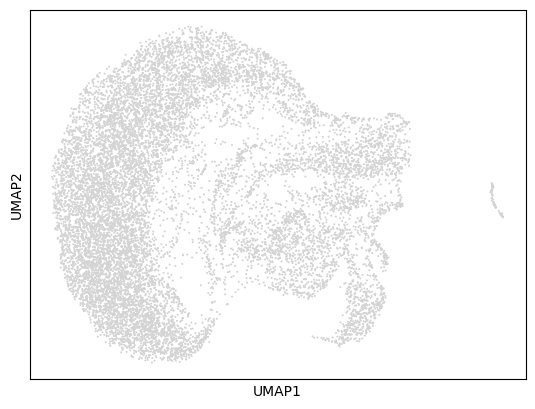

In [3]:
# Compute PCA coordinates
scanpy.pp.pca(data)

# Compute the nearest neighbors distance matrix
scanpy.pp.neighbors(data)

# Embed the neighborhood graph using UMAP
scanpy.tl.umap(data)

# Visualize the data with a UMAP
scanpy.pl.umap(data)

In [4]:
# Remove cells with a feature count below 600
scanpy.pp.filter_cells(data, min_counts=600)

# Remove cells with a feature count above 9000
scanpy.pp.filter_cells(data, max_counts=9000)

# Print information
data

AnnData object with n_obs × n_vars = 11062 × 32285
    obs: 'n_counts'
    var: 'gene_ids', 'feature_types'
    uns: 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [5]:
data.var["mt"] = data.var_names.str.startswith("mt-")

scanpy.pp.calculate_qc_metrics(data, qc_vars=["mt"], inplace=True)

# Remove cells with a fraction of mitochondrial genes higher than 10%
data = data[data.obs.pct_counts_mt < 10, :]

# Print information
data

View of AnnData object with n_obs × n_vars = 10888 × 32285
    obs: 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'